# Movie Genres Data Analysis Project

Here are some things I want to look at:
### Research Questions (Q):

1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revenue?
3. Which genres have high avg. profit?
4. Which genres have high avg. popularity?
5. Which genres have highest number of movies with a voting avg. >=8?

### Research Hypotheses (H):

1. The best movies according to vote avg. return high profits and revenue.
2. The best movies according to popularity return high profit and revenue.
4. Highly budgeted movies return high profit.
5. Highly budgeted movies have a high popularity.


In [18]:
# Importing libraries that will be used.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [7]:
# Reading in the raw file.

movies = pd.read_csv(r"C:\Users\garri\OneDrive\Desktop\NOTES\Pandas Notes\Importing Test Files\imdb_movies.csv")
movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [8]:
# Checking some info about the data's datatypes.

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
# Checking for duplicates

movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
# Dropping the duplicate row.

movies.drop_duplicates(inplace= True)


In [11]:
# Looking at the data again.

movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [12]:
# Dropping any row that has missing Genre values.

movies.dropna(subset= ['genres'], inplace= True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [14]:
# Creating a new column for profit and calculating it.

movies['profit'] = movies['revenue'] - movies['budget']

movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,0


In [108]:

movies.drop_duplicates(inplace= True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average', 'profit']]


In [109]:
# Removing some columns that I do not need. I did it by selecting the columns I want to keep.

movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average', 'profit']]

In [112]:
# Splitting the genres field off of the | character between them, creating list values of the Genres. Using the .apply() function to create a Series on the 1 axis and creating a multilayered index for each of the lists with the .stack() function.

split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()

# Dropping a level of index to ensure that all of the genres are assigned to the same movie index.
split.index = split.index.droplevel(-1)

# Naming the new genres column
split.name = 'genres_split'

# Deleting the old genres column.
del movies_genre['genres']

# Joining in the new split series.
movies_genre = movies_genre.join(split)

movies_genre

C:\Users\garri\AppData\Local\Temp\ipykernel_15940\2026529244.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()


,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1966,11,6.500000,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1966,11,6.500000,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,1966,22,5.400000,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,1966,22,5.400000,0,Comedy


### Research Question 1
Which genres are the most common (Number of movies made)?

In [33]:
# Creating a DataFrame based on a count of Genres, sorted by the Original Title in Descending order.

genres_count = pd.DataFrame(movies_genre.groupby('genres_split')['original_title'].count()).sort_values('original_title', ascending= False)

genres_count


,original_title
genres_split,
Drama,4760
Comedy,3793
Thriller,2907
Action,2384
Romance,1712
Horror,1637
Adventure,1471
Crime,1354
Family,1231


<Axes: title={'center': 'Movies Per Genres in %'}, ylabel='original_title'>

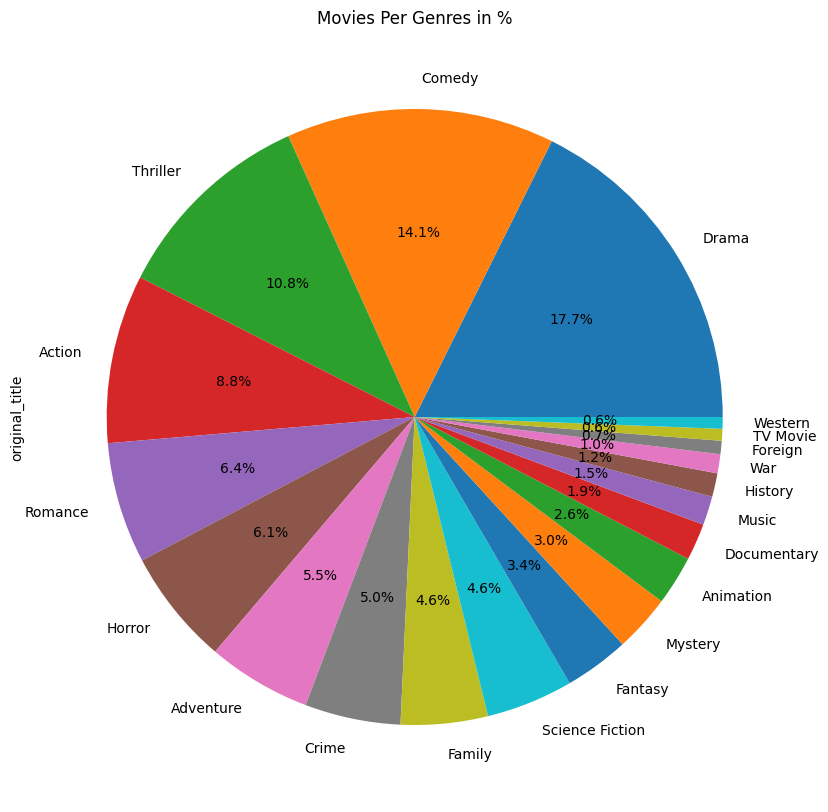

In [35]:
# Using a Pie chart to create a visualization of the genre count percentages.

genres_count['original_title'].plot.pie(title = 'Movies Per Genres in %', autopct= '%1.1f%%', figsize = (10,10))

<Axes: title={'center': 'Movies Per Genre'}, xlabel='genres_split'>

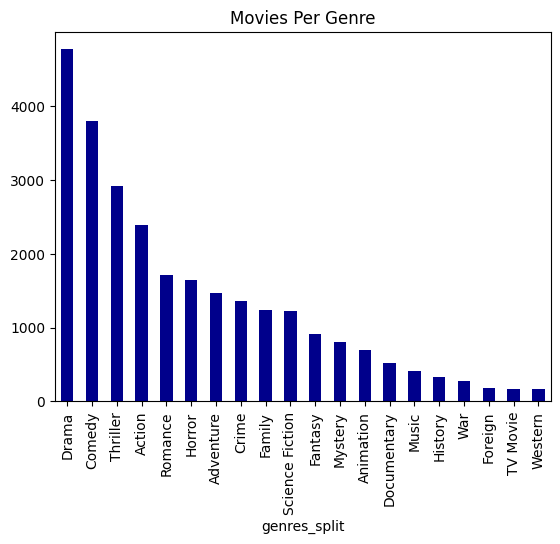

In [42]:
# Creating a Bar Chart to show the number of movies per genre.

genres_count['original_title'].plot.bar(title= 'Movies Per Genre', color= 'DarkBlue')

### Research Question 2
Which genres have high avg. budget and revenue?

In [52]:
# Gathering the average values for each of the numeric columns grouped by Genre.

genres_avg_budget = movies_genre.groupby('genres_split').mean(numeric_only= True)

# Changing the format from scientific notation to a normal notation.
pd.options.display.float_format = '{:2f}'.format
genres_avg_budget

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [55]:
# Sorting the df based on 'budget' in descending order.

genres_avg_budget.sort_values('budget', ascending= True, inplace= True)
genres_avg_budget

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
TV Movie,0.270896,267664.670659,251497.005988,91.982036,34.365269,5.788024,-16167.664671
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,16.627660,5.981383,69024.909574
Horror,0.465357,6226529.210751,16822808.624313,94.424557,120.059866,5.337447,10596279.413561
Music,0.487321,9438627.549020,28571768.691176,105.137255,124.340686,6.480392,19133141.142157
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Romance,0.592082,12531271.847547,35691972.327103,106.891355,166.070678,6.042874,23160700.479556
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Mystery,0.690012,16119270.062963,40217566.661728,105.928395,236.998765,5.946790,24098296.598765


<Axes: title={'center': 'Budget and Revenue by Genre'}, xlabel='genres_split'>

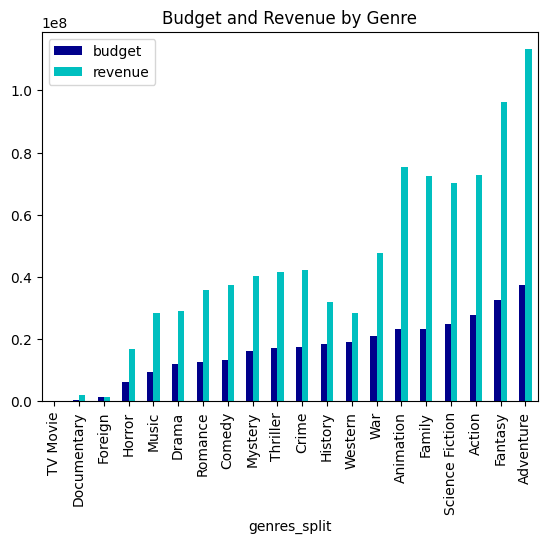

In [56]:
# Creating a bar chart to show the budget and revenues by Genre, ordered by Budget.

genres_avg_budget[['budget', 'revenue']].plot.bar(title= 'Budget and Revenue by Genre', color= ('DarkBlue', 'c'))

In [57]:
# Changing the sort order from Budget to Revenue and creating a new df to plot off of.

genres_avg_revenue = genres_avg_budget.sort_values('revenue', ascending= True, inplace= True)
genres_avg_revenue

<Axes: title={'center': 'Budget and Revenue by Genre'}, xlabel='genres_split'>

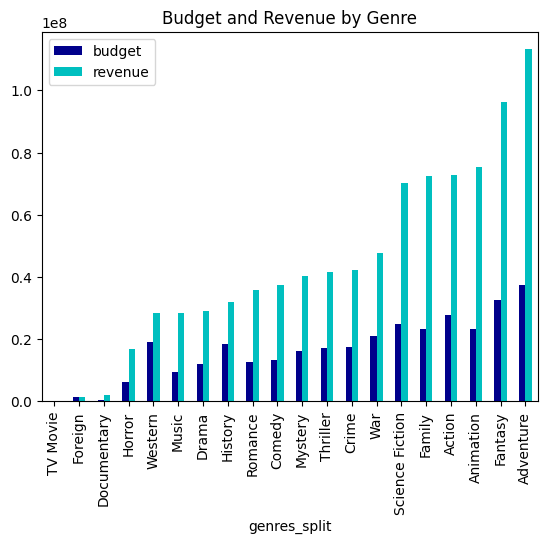

In [58]:
# Creating a bar chart to show the budget and revenues by Genre, ordered by Revenue.

genres_avg_budget[['budget', 'revenue']].plot.bar(title= 'Budget and Revenue by Genre', color= ('DarkBlue', 'c'))

### Research Question 3
Which genres have high avg. profit?

<Axes: title={'center': 'Average Profit by Genre'}, xlabel='genres_split'>

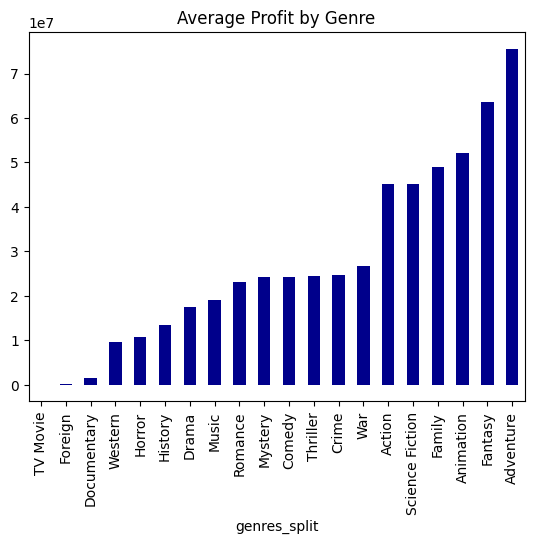

In [60]:
# Changing the sort values parameter to the 'profit' column.
genres_avg_profit = genres_avg_budget.sort_values('profit', ascending= True, inplace= True)

# Creating a bar chart to display average profit per genre type.
genres_avg_budget['profit'].plot.bar(title= 'Average Profit by Genre', color= ('DarkBlue'))

### Research Question 4
Which genres have high avg. popularity?

<Axes: title={'center': 'Average Popularity by Genre'}, xlabel='genres_split'>

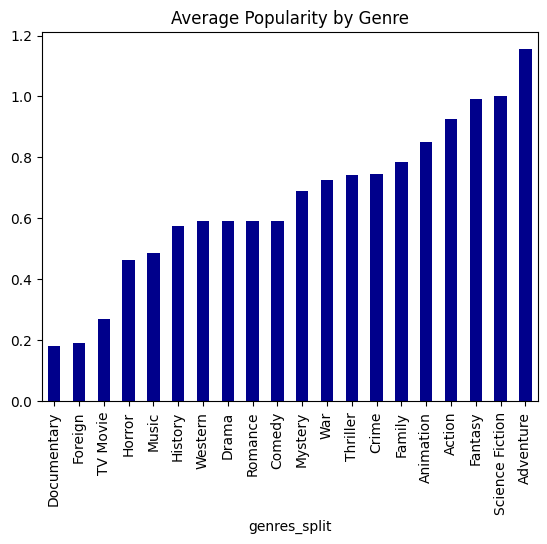

In [61]:
# Changing the sort values parameter to the 'popularity' column.
genres_avg_pop = genres_avg_budget.sort_values('popularity', ascending= True, inplace= True)

# Creating a bar chart to display average popularity per genre type.
genres_avg_budget['popularity'].plot.bar(title= 'Average Popularity by Genre', color= ('DarkBlue'))

### Research Question 5
Which genres have the highest number of movies with a voting avg. >= 8?

In [74]:
# Filtering the df down to movies with at least 50 votes and vote average greater than or equal to 8.

vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_fifty

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Comedy
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Animation
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Family
35,3.557846,6000000,35401758,Room,117,10/16/15,1520,8.000000,29401758,Drama
35,3.557846,6000000,35401758,Room,117,10/16/15,1520,8.000000,29401758,Thriller
...,...,...,...,...,...,...,...,...,...,...
10141,2.610362,806948,32000000,Psycho,109,8/14/60,1180,8.000000,31193052,Horror
10141,2.610362,806948,32000000,Psycho,109,8/14/60,1180,8.000000,31193052,Thriller
10222,2.377288,22000000,321265768,Schindler's List,195,11/29/93,2632,8.100000,299265768,Drama
10222,2.377288,22000000,321265768,Schindler's List,195,11/29/93,2632,8.100000,299265768,History


In [75]:
# Creating a DataFrame to display the number of movies with a vote average over 8 per genre.

genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending= False)
genres_vote


,vote_average
genres_split,
Documentary,5
Drama,5
Crime,4
Action,2
History,2
Thriller,2
Romance,2
Music,2
War,2


<Axes: title={'center': 'Vote Average Above 8 by Genre'}, xlabel='genres_split'>

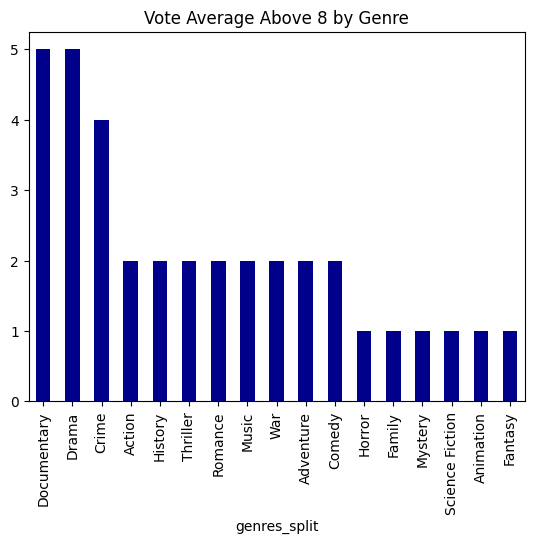

In [78]:
# Creating a bar chart for the above DF.

genres_vote['vote_average'].plot.bar(title= 'Vote Average Above 8 by Genre', color= ('DarkBlue'))

### Research Hypotheses 1:
The best movies according to vote avg. return high profits and revenue.

In [81]:
# Reading in the raw file to get the data back in its raw format.
movies = pd.read_csv(r"C:\Users\garri\OneDrive\Desktop\NOTES\Pandas Notes\Importing Test Files\imdb_movies.csv")
movies

#Dropping duplicates again.
movies.drop_duplicates(inplace= True)

#Creating the profit column.
movies['profit'] = movies['revenue'] - movies['budget']

# Filtering down to only columns I care to see.
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'profit']]

movies_genre

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,6/15/66,11,7.400000,0
10862,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,12/21/66,20,5.700000,0
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,1/1/66,11,6.500000,0
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,11/2/66,22,5.400000,0


In [83]:
# Reusing the script for all movies with a vote count > 50.
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]

# Using the .corr() correlation method to see what correlations I can see between vote average and profits & revenue. Will be using the Spearman method to filter out a bit of the outliers.
movies_counted.corr(numeric_only= True, method= 'spearman')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.768966,0.188670,0.498117
budget,0.485149,1.000000,0.714828,0.360230,0.554586,-0.044440,0.334390
revenue,0.588739,0.714828,1.000000,0.341707,0.682656,0.111731,0.842221
runtime,0.230518,0.360230,0.341707,1.000000,0.263460,0.285514,0.212060
vote_count,0.768966,0.554586,0.682656,0.263460,1.000000,0.284470,0.583602
vote_average,0.188670,-0.044440,0.111731,0.285514,0.284470,1.000000,0.198308
profit,0.498117,0.334390,0.842221,0.212060,0.583602,0.198308,1.000000


<Axes: xlabel='vote_average', ylabel='profit'>

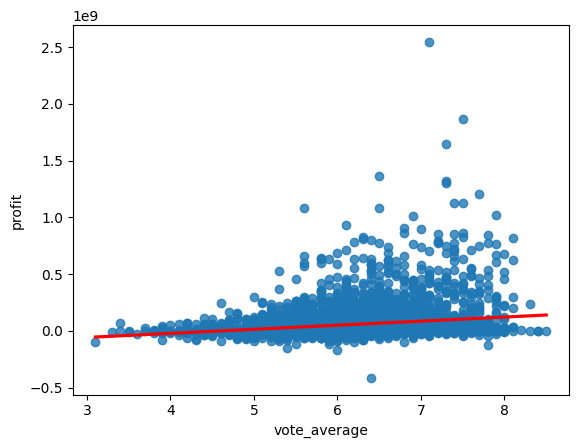

In [88]:
# Using Seaborn to create a regression line plot to see the correlation between vote average and profit.

sns.regplot(data= movies_counted, x= 'vote_average', y= 'profit', line_kws= {'color': 'red'})

# From this figure, we can determine that there is only a small correlation (if any) between the vote average and movie profit. However, there is a lot more outliers in profit as you move up in vote_average, which is to be expected.

<Axes: xlabel='vote_average', ylabel='revenue'>

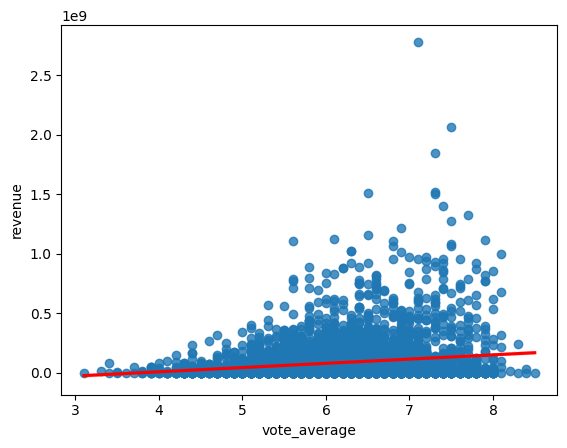

In [89]:
# Using Seaborn to create a regression line plot to see the correlation between vote average and revenue.

sns.regplot(data= movies_counted, x= 'vote_average', y= 'revenue', line_kws= {'color': 'red'})

# Again, there is only a small correlation between vote average and revenue with more high outliers as you move up in vote average.

### Research Hypotheses 2:
The best movies according to popularity return high profit and revenue.

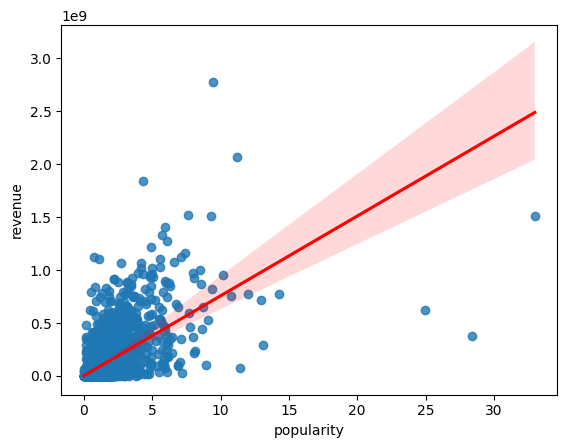

<Figure size 2000x1000 with 0 Axes>

In [93]:
#Creating a regression plot to analyze the correlation between Popularity and Revenue
sns.regplot(data= movies_counted, x= 'popularity', y= 'revenue', line_kws= {'color': 'red'})
plt.figure(figsize= (20,10))
plt.show()

# From this figure, we can determine that the Popularity and Revenue are highly correlated. With Revenue generally going up as Revenue goes up.

### Research Hypotheses 3:
Highly budgeted movies return high profit.

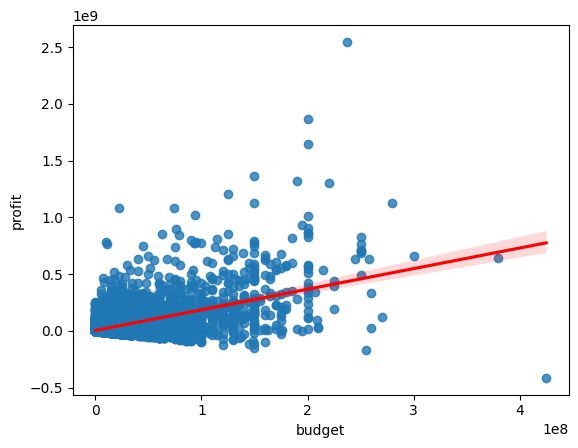

<Figure size 2000x1000 with 0 Axes>

In [95]:
#Creating a regression plot to analyze the correlation between Budget and Profit
sns.regplot(data= movies_counted, x= 'budget', y= 'profit', line_kws= {'color': 'red'})
plt.figure(figsize= (20,10))
plt.show()

# From this figure, we can determine that the Budget and Profit are positively correlated. Movies with higher budgets tend to make higher profits as well.

### Research Hypotheses 4:
Highly budgeted movies have a high popularity.

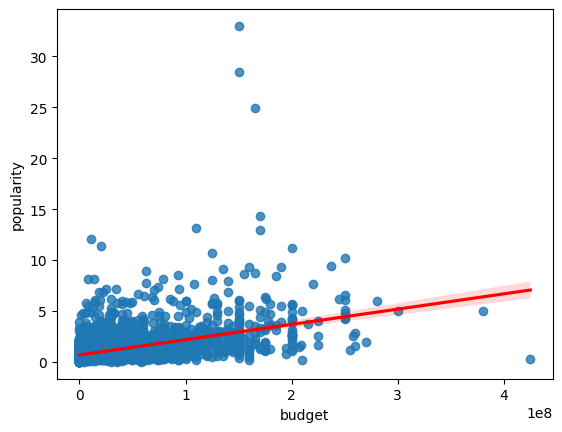

<Figure size 2000x1000 with 0 Axes>

In [96]:
#Creating a regression plot to analyze the correlation between Budget and Popularity.
sns.regplot(data= movies_counted, x= 'budget', y= 'popularity', line_kws= {'color': 'red'})
plt.figure(figsize= (20,10))
plt.show()

# From this figure, we can determine that the Budget and Profit are slightly positively correlated. Movies with higher budgets tend to be more popular.

### Bonus Insight!
Profit per Genre per Year Released

In [113]:
# Quick look at the data.
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action


In [116]:
# Creating a multilayer index dataframe to group by the release year and then all genres, with the average profit for each genre that year. 

time_genre = pd.DataFrame(movies_genre.groupby(['release_year', 'genres_split'])['profit'].mean())
time_genre

profit
release_year genres_split                   
1960         Action           6363125.000000
             Adventure         431000.000000
             Comedy           5258750.000000
             Crime                  0.000000
             Drama            8245619.384615
...                                      ...
2015         Science Fiction 83321303.523256
             TV Movie         -150000.000000
             Thriller        32869106.847953
             War             54677314.333333
             Western         72856619.000000

[1049 rows x 1 columns]

In [119]:
# Pivoting the above dataframe to have the Year Released as columns, while keeping the Genre as the index.

time_genre_pivoted = pd.pivot_table(time_genre, values= 'profit', index= ['genres_split'], columns= ['release_year'])

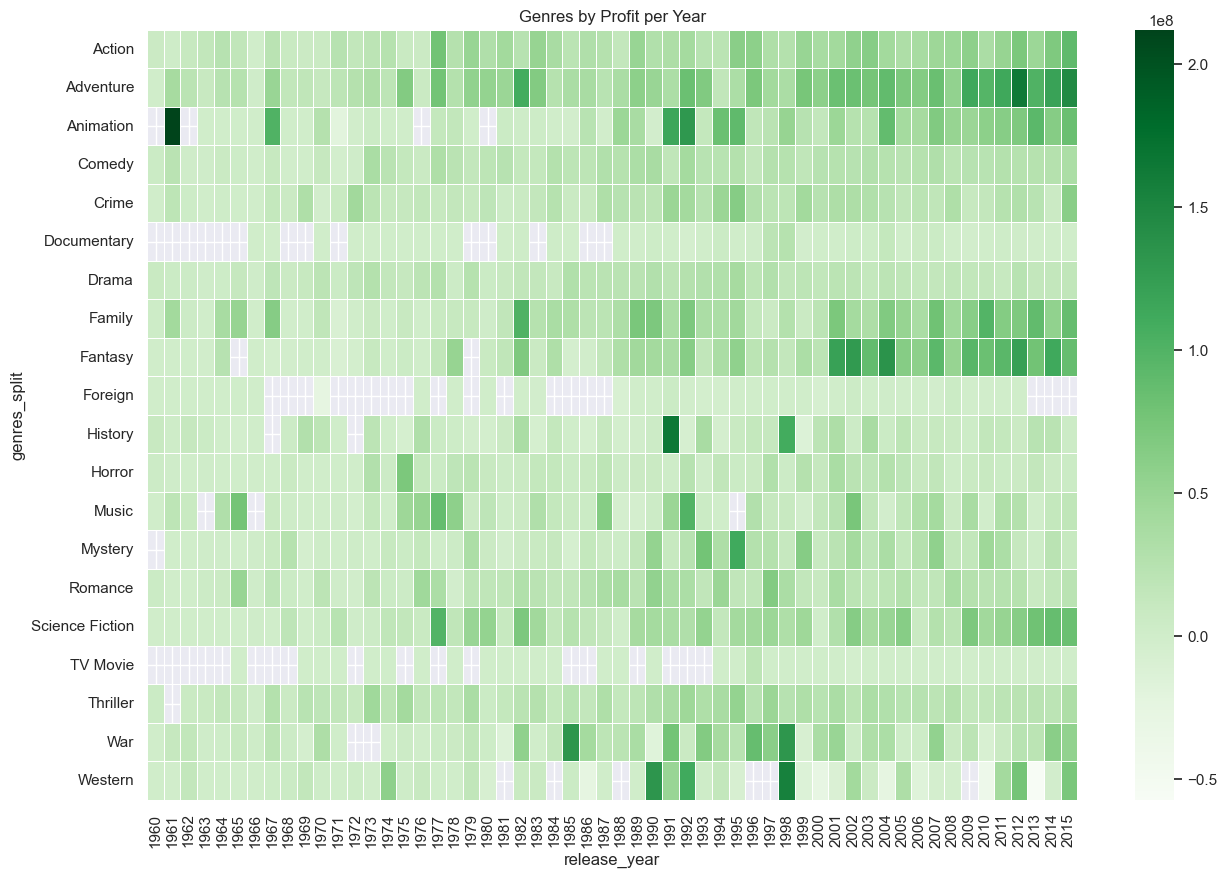

In [127]:
# Using the Pivoted table to creat a heatmap of all movies of all genres across the years.

sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(data= time_genre_pivoted, cmap= 'Greens', linewidths= .5)
plt.title('Genres by Profit per Year')
plt.show()

# From this heatmap we can make a few different assumptions:
# 1. Adventure, Fantasy, Animation, and Science Fiction movies really started picking up around the year 2000. I believe this is due to the rise of comic book -> big screen adaptations of media such as Marvel and DC superhero movies. I also think this could be partially attributed to the advancement of technologies such as CGI and better movie editing. Some of these comics were difficult to bring to the live action stage prior to these advancements, and it helped garner the attention of viewers who otherwise would not have been interested in these genres of film.
# 2. Western and War movies seemed to have been very popular in the 90s and have since died off. Probably in favor of more Sci-Fi style movies.
# 3. It is very interesting to see well known movies reveal themselves in the heat map, such as: {1961: Animation}, this is likely '101 Dalmations'. {1977: Science Fiction}, this is likely the great 'Star Wars: A New Hope'. 